# 1. Libraries
First, let's import the necessary libraries and dependencies:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist     # to load MNIST data
from tensorflow.keras.models import Sequential  # to create a neural network
from tensorflow.keras.layers import Dense       # to adding layers
from tensorflow.keras.optimizers import SGD     # to optimize via gradient descent

In [4]:
# [Runtime] -> [Change Runtime Type] -> Hardware Accelerator -> Choose a GPU
tf.config.list_physical_devices('GPU')

[]

<img src='https://miro.medium.com/v2/resize:fit:1400/0*T6W0rRy8vgFU_K7Z.png'>

# 2. Loading and Preprocessing the Data
- Next, we'll load the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset and preprocess it.
- MNIST is a commonly used dataset for handwritten digit recognition.
- It consists of a training set of 60,000 examples and a test set of 10,000 examples.
- Each example is a 28 x 28 grayscale image of a handwritten digit, along with its corresponding label (0 to 9).
- We'll reshape the input data, convert it ot floating-point numbers, and scale the pixel values between 0 and 1:

<img src='https://www.mdpi.com/applsci/applsci-09-03169/article_deploy/html/images/applsci-09-03169-g001.png'>

In [5]:
# Load the MNIST dataset (MNIST 데이터 불러오기)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print the dimension of the data (데이터 차원 확인하기)
print('X_train shape:', X_train.shape)  # (Num. train, height, width)
print('X_test shape:', X_test.shape)    # (Num. train,  )
print('y_train shape:', y_train.shape)  # (Num. test, height, width)
print('y_test shape:', y_test.shape)    # (Num. test,   )

11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


In [6]:
# Preprocess the data (데이터 전처리)
# Reshape the input data to a 1D array with 784 features (28 x 28 -> 784)
X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000, 784))

# Print the dimension of the data (데이터 차원 확인하기)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (60000, 784)
X_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


In [7]:
# Before normalization, the pixels of an image range from 0 to 255
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [8]:
# Convert the data type to float32 and scale the values between 0 and 1
# (Float 자료형으로 변환 후 0과 1 사이의 값을 갖도록 변환)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [9]:
# Now, the pixel values should be in the range of (0, 1)
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# 3. Building the Neural Network Model
- Now, we'll define and build our neural network model using Keras implemented in Tensorflow.
- The input layer has 784 units.
- The hidden layer has 512 units, with a ReLU activation function.
- The output layer should have 10 units, because we are doing a 10-class classification task!
- We will use Stochastic Gradient Descent (SGD) algorithm to optimize the model parameters (i.e., weights and biases).

In [10]:
# Define a neural network with one hidden layer
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784, )))
model.add(Dense(10, activation='softmax'))

# Define optimization method (모델 최적화 방법)
# SGD = Stochastic Gradient Descent
optimizer = SGD(learning_rate=0.01,  # TODO: try different values
                weight_decay=0.0,    # TODO: try different values
                momentum=0.0,        # TODO: try 0.9
                )

# Compile the model (모델 컴파일)
model.compile(
    optimizer=optimizer,                     # SGD 사용
    loss='sparse_categorical_crossentropy',  # 손실함수 정의
    metrics=['accuracy']                     # 평가용 metric 추가
)

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 4. Model Training
- During training, the model will learn to recognize patterns and features in the input images and associate them with the corresponding labels:

In [11]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,             # 모델이 학습 데이터 전체를 보는 횟수
                    batch_size=128,        # 모델이 1회 업데이트 시 처리하는 관측치 수
                    validation_split=0.1,  # 전체의 10%를 validation 용도로 사용
                    )

Epoch 1/10
422/422 [==============================] - 5s 11ms/step - loss: 1.1599 - accuracy: 0.7395 - val_loss: 0.5922 - val_accuracy: 0.8833
Epoch 2/10
422/422 [==============================] - 3s 8ms/step - loss: 0.5577 - accuracy: 0.8655 - val_loss: 0.4070 - val_accuracy: 0.9032
Epoch 3/10
422/422 [==============================] - 3s 7ms/step - loss: 0.4451 - accuracy: 0.8840 - val_loss: 0.3425 - val_accuracy: 0.9140
Epoch 4/10
422/422 [==============================] - 3s 7ms/step - loss: 0.3944 - accuracy: 0.8933 - val_loss: 0.3096 - val_accuracy: 0.9190
Epoch 5/10
422/422 [==============================] - 4s 9ms/step - loss: 0.3638 - accuracy: 0.8999 - val_loss: 0.2886 - val_accuracy: 0.9217
Epoch 6/10
422/422 [==============================] - 4s 9ms/step - loss: 0.3423 - accuracy: 0.9051 - val_loss: 0.2722 - val_accuracy: 0.9270
Epoch 7/10
422/422 [==============================] - 3s 7ms/step - loss: 0.3256 - accuracy: 0.9094 - val_loss: 0.2597 - val_accuracy: 0.9287
Epoch

# 5. Evaluating the Model
- After training, we can evaluate the performance of our neural network on the test set.
- The model's accuracy and loss on the test set provide insights into its generalization ability.

In [12]:
# Evaluate the model on the test set (테스트 데이터에 대한 예측 결과 평가하기)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss     : %.4f' % test_loss)
print('Test accuracy : %.4f' % test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2708 - accuracy: 0.9250
Test loss     : 0.2708
Test accuracy : 0.9250


# 6. Visualizing the Training Trajectory
- We can also visualize the training history to gain insights into the model's performance.
- The accuracy and loss curves show how the model's performance changes over the training epochs:

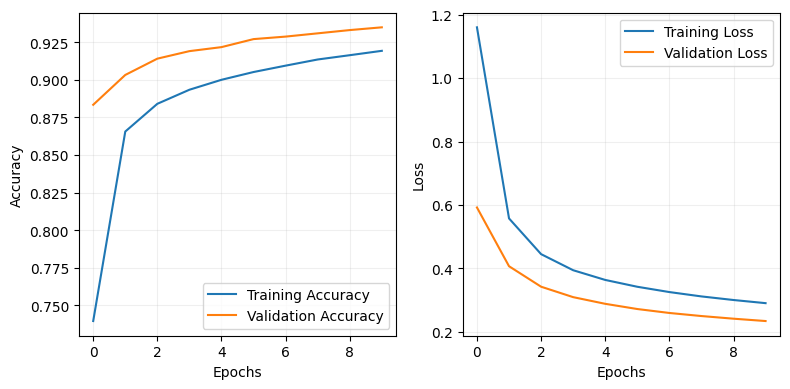

In [13]:
# Plot the training accuracy and loss
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#plt.axhline(y=test_acc, color='r', linestyle='--', label='Final Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True, alpha=.2)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
#plt.axhline(y=test_loss, color='r', linestyle='--', label='Final Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True, alpha=.2)

plt.tight_layout()
plt.show()

# 7. Advanced Techniques

In [17]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [21]:
# Define a neural network with one hidden layer
model = Sequential()
model.add(Dense(512, activation='relu', kernel_initializer='glorot_normal', input_shape=(784, )))
model.add(Dropout(0.5))
model.add(Dense(10, kernel_initializer='glorot_normal', activation='softmax'))

# Define optimization method (모델 최적화 방법)
# SGD = Stochastic Gradient Descent
optimizer = Adam(learning_rate=0.001,
                 beta_1=0.9,
                 beta_2=0.999,
                 weight_decay=0.001,
                 )

# Compile the model (모델 컴파일)
model.compile(
    optimizer=optimizer,                     # SGD 사용
    loss='sparse_categorical_crossentropy',  # 손실함수 정의
    metrics=['accuracy'],                    # 평가용 metric 추가
)

# Print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Early stopping callback
early_stopping = EarlyStopping(monitor="val_loss",
                               min_delta=1e-3,
                               patience=5,
                               verbose=1,
                               )

# Train the model
history = model.fit(X_train, y_train,
                    epochs=100,            # 모델이 학습 데이터 전체를 보는 횟수
                    batch_size=128,        # 모델이 1회 업데이트 시 처리하는 관측치 수
                    validation_split=0.1,  # 전체의 10%를 validation 용도로 사용
                    callbacks=[early_stopping],
                    )

Epoch 1/100
422/422 [==============================] - 5s 12ms/step - loss: 0.3496 - accuracy: 0.8980 - val_loss: 0.1345 - val_accuracy: 0.9635
Epoch 2/100
422/422 [==============================] - 5s 13ms/step - loss: 0.1684 - accuracy: 0.9506 - val_loss: 0.0939 - val_accuracy: 0.9755
Epoch 3/100
422/422 [==============================] - 4s 10ms/step - loss: 0.1260 - accuracy: 0.9620 - val_loss: 0.0781 - val_accuracy: 0.9777
Epoch 4/100
422/422 [==============================] - 6s 15ms/step - loss: 0.1027 - accuracy: 0.9691 - val_loss: 0.0702 - val_accuracy: 0.9808
Epoch 5/100
422/422 [==============================] - 5s 11ms/step - loss: 0.0877 - accuracy: 0.9733 - val_loss: 0.0661 - val_accuracy: 0.9805
Epoch 6/100
422/422 [==============================] - 4s 10ms/step - loss: 0.0751 - accuracy: 0.9770 - val_loss: 0.0660 - val_accuracy: 0.9815
Epoch 7/100
422/422 [==============================] - 5s 12ms/step - loss: 0.0683 - accuracy: 0.9798 - val_loss: 0.0626 - val_accuracy:

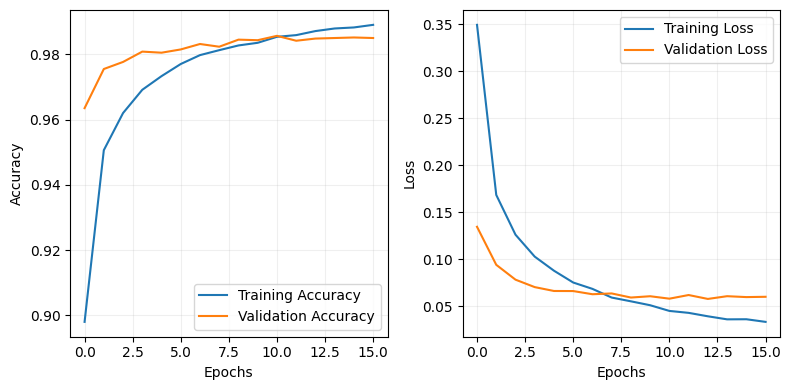

In [23]:
# Plot the training accuracy and loss
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True, alpha=.2)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True, alpha=.2)

plt.tight_layout()
plt.show()